In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Define linear regression formula and loss function

In [3]:
def linear_loss(X, y, w, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # Model Formula
    y_hat = np.dot(X, w) + b
    # Loss Function (MSE)
    loss = np.sum((y_hat - y)**2)/num_train
    # Partial Derivative of Parameters
    dw = np.dot(X.T, (y_hat - y))/num_train
    db = np.sum((y_hat - y))/num_train
    return  y_hat, loss, dw, db

#### Initialize the parameters

In [4]:
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b= 0
    return w, b

#### Define a function to optimize the parameters with gradient descent

In [5]:
def linear_train(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1])
    loss_list = []
    for i in range(1, epochs):
        y_hat, loss, dw, db = linear_loss(X, y ,w, b)
        loss_list.append(loss)
        # gradient descent
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
            
        params = {
            "w": w,
            "b": b
        }
        
        grads = {
            "dw": dw,
            "db": db
        }
        
    return loss_list, loss, params, grads

#### Use the Diabetes dataset from sklearn as an example for simple training

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

# load the data
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

In [7]:
# train test split
X, y = shuffle(data, target, random_state = 13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [8]:
loss_list, loss, params, grads = linear_train(X_train, y_train, 0.001, 100000)

epoch 10000 loss 5533.039734
epoch 20000 loss 5217.582409
epoch 30000 loss 4949.676466
epoch 40000 loss 4721.504031
epoch 50000 loss 4526.567333
epoch 60000 loss 4359.463960
epoch 70000 loss 4215.700505
epoch 80000 loss 4091.538010
epoch 90000 loss 3983.863771


In [9]:
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454]])

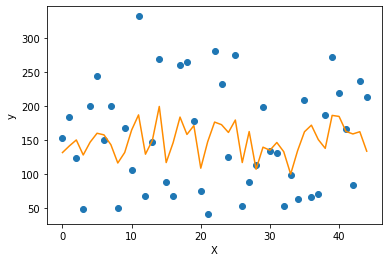

In [10]:
# visualize the result
f = X_test.dot(params['w'])+ params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()